In [1]:
'''
Test notebook to do the import by filesnames and not by creation date
'''

'\nTest notebook to do the import by filesnames and not by creation date\n'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from osgeo import gdal
import os
import xarray as xr
import pickle
from netCDF4 import Dataset

In [11]:
#create dictionary
dataDict = {}

#names of simulations
name_list = ['az','sg', 'lc', 'na']

#create parameter list
parameters = [
"topographic__elevation",
"soil__depth",
"sediment__flux",
"landform__ID",
"precipitation",
"landform__ID",
"erosion__rate",
"vegetation__density",
'slope_degrees'
]

for name in name_list:
    dataDict[name] = {}
    for p in parameters:
        dataDict[name][p] = []

path = '/home/mschmid/Desktop/Paper_2_analysis/results/paper_2_results/cum_vegetation_different_diff/'
path_to_output = '/ll_output/NC'

path_list = []
for name in name_list:
    path_list.append(os.path.join(path + name + path_to_output))

In [12]:
#netcdf input
elapsed_time_start = 4900000
elapsed_time_end   = 4922000
dt                 = 100
output_start       = 49000
output_end         = 49220
output_array       = np.arange(output_start, output_end, 1)
elapsed_time_array = np.arange(elapsed_time_start, elapsed_time_end, dt)

#csv_climate input
path_to_csv = '/debugging/'
filenames = 'climate.000'
all_csv_timesteps = np.arange(0,220,1)
all_csv_filenames = [str(filenames + str(t).zfill(3) + ".out") for t in all_csv_timesteps]

In [13]:
counter = 0

for name,simu in zip(name_list,path_list):
    _temp_temperature = []
    for elapsed, output, csv in zip(elapsed_time_array, output_array, all_csv_filenames):

        #netcdf handling
        nc_file_path = os.path.join(simu + f'/output{elapsed}__{output}.nc')
        _dataDump = Dataset(nc_file_path)
        counter += 1

        if counter % 100 == 0:
            print('100 files done')

        for p in parameters:
            _cutDump = _dataDump.variables[p][:][0]
            #delete boundary nodes
            _cutDump = np.delete(_cutDump, 0 , axis = 0) 
            _cutDump = np.delete(_cutDump,-1 , axis = 0)
            _cutDump = np.delete(_cutDump, 0 , axis = 1)
            _cutDump = np.delete(_cutDump,-1 , axis = 1)

            dataDict[name][p].append(_cutDump)

        #csv handling
        _temp_path = os.path.join(path + name + f'/debugging/{csv}')
        _temp_df = pd.read_csv(_temp_path, delim_whitespace = True)
        _temp_temperature.append(_temp_df['temp'].mean())
        
    dataDict[name]['temp'] = _temp_temperature
        
        
        
        #print(f'output{elapsed}__{output}.nc')
        
print('All done.')

100 files done
100 files done
100 files done
100 files done
100 files done
100 files done
100 files done
100 files done
All done.


In [20]:
length_of_dataseries = np.shape(dataDict['az']['erosion__rate'])[0]

minV = 0
maxV = -1
azucar_vegi   = [np.mean(v)*100 for v in dataDict['az']['vegetation__density']]
azucar_soil   = [np.mean(v) for v in dataDict['az']['soil__depth']]
azucar_rain   = [np.mean(v)*10 for v in dataDict['az']['precipitation']]
azucar_erosion= [np.mean(v)*1000 for v in dataDict['az']['erosion__rate']]

azucar_vegi   = azucar_vegi[minV:maxV]
azucar_soil   = azucar_soil[minV:maxV]
azucar_rain   = azucar_rain[minV:maxV]
azucar_erosion= azucar_erosion[minV:maxV]

santa_gracia_vegi   = [np.mean(v)*100 for v in dataDict['sg']['vegetation__density']]
santa_gracia_soil   = [np.mean(v) for v in dataDict['sg']['soil__depth']]
santa_gracia_rain   = [np.mean(v)*10 for v in dataDict['sg']['precipitation']]
santa_gracia_erosion= [np.mean(v)*1000 for v in dataDict['sg']['erosion__rate']]

santa_gracia_vegi   = santa_gracia_vegi[minV:maxV]
santa_gracia_soil   = santa_gracia_soil[minV:maxV]
santa_gracia_rain   = santa_gracia_rain[minV:maxV]
santa_gracia_erosion= santa_gracia_erosion[minV:maxV]

la_campana_vegi   = [np.mean(v*100) for v in dataDict['lc']['vegetation__density']]
la_campana_soil   = [np.mean(v) for v in dataDict['lc']['soil__depth']]
la_campana_rain   = [np.mean(v)*10 for v in dataDict['lc']['precipitation']]
la_campana_erosion= [np.mean(v)*1000 for v in dataDict['lc']['erosion__rate']]

la_campana_vegi   = la_campana_vegi[minV:maxV]
la_campana_soil   = la_campana_soil[minV:maxV]
la_campana_rain   = la_campana_rain[minV:maxV]
la_campana_erosion= la_campana_erosion[minV:maxV]

nahuelbuta_vegi   = [np.mean(v)*100 for v in dataDict['na']['vegetation__density']]
nahuelbuta_soil   = [np.mean(v) for v in dataDict['na']['soil__depth']]
nahuelbuta_rain   = [np.mean(v)*10 for v in dataDict['na']['precipitation']]
nahuelbuta_erosion= [np.mean(v)*1000 for v in dataDict['na']['erosion__rate']]

nahuelbuta_vegi   = nahuelbuta_vegi[minV:maxV]
nahuelbuta_soil   = nahuelbuta_soil[minV:maxV]
nahuelbuta_rain   = nahuelbuta_rain[minV:maxV]
nahuelbuta_erosion= nahuelbuta_erosion[minV:maxV]


#calculate means


time_vector = np.arange(0, np.shape(azucar_erosion)[0] * 100, 100)

### Correlation Coefficients
#### Timeseries

#### Total Correlation Coefficients

## Plots per Area

In [21]:
#array of cumulative fpc values for azucar
azucar_vegi_cum = azucar_vegi
santa_gracia_vegi_cum = santa_gracia_vegi
la_campana_vegi_cum = la_campana_vegi
nahuelbuta_vegi_cum = nahuelbuta_vegi


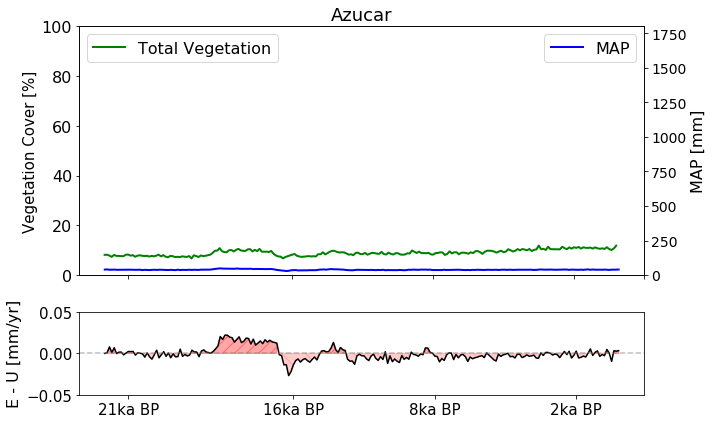

In [22]:
x1 = [1000, 8000, 14000, 20000, 23000]
labels = ['21ka BP','16ka BP','8ka BP','2ka BP', 'PD']

fig,ax = plt.subplots(nrows = 2,
                      ncols = 1,
                      figsize = [10,6], 
                      gridspec_kw = {'height_ratios' : [3,1] },
                      sharex = True)


#AZUCAR
ax[0].set_title('Azucar', fontsize = 18)
ax[0].plot(time_vector, azucar_vegi_cum, 'g', label = 'Total Vegetation', linewidth = 2)
ax[0].axes.tick_params(labelsize = 16)
ax[0].legend(loc = 'upper left', fontsize = 16)
ax[0].set_ylim(0,100)
ax[0].set_ylabel('Vegetation Cover [%]', fontsize = 15)

ax00_y = ax[0].twinx()
ax00_y.plot(time_vector, azucar_rain, 'b', label = 'MAP', linewidth = 2)
ax00_y.legend(loc = 'upper right', fontsize = 16)
ax00_y.axes.tick_params(labelsize = 14)
ax00_y.set_ylim(0, 1800)
ax00_y.set_ylabel('MAP [mm]', fontsize = 16)


ax[1].plot(time_vector, [e-.1 for e in azucar_erosion], 'k', linewidth = 1.5)
ax[1].axes.tick_params(labelsize = 15)
ax[1].set_ylim(-0.05,0.05)
ax[1].set_ylabel('E - U [mm/yr]', fontsize = 16)
ax[1].axhline(0, color = 'grey', linestyle = '--', alpha = 0.5)

e_minus_u = [e-.1 for e in azucar_erosion]
ax[1].fill_between(time_vector, 0, e_minus_u,
                   where = e_minus_u > np.zeros(np.shape(e_minus_u)),
                   color = 'red',
                   hatch = '//',
                   alpha = 0.35)
ax[1].fill_between(time_vector, 0, e_minus_u,
                   where = e_minus_u < np.zeros(np.shape(e_minus_u)),
                   color = 'red',
                   hatch = '\\',
                   alpha = 0.2)

ax[0].set_xticks(x1)
ax[0].set_xticklabels(labels)

plt.tight_layout()

plt.savefig('azucar_total_veg_map_erosion.png')

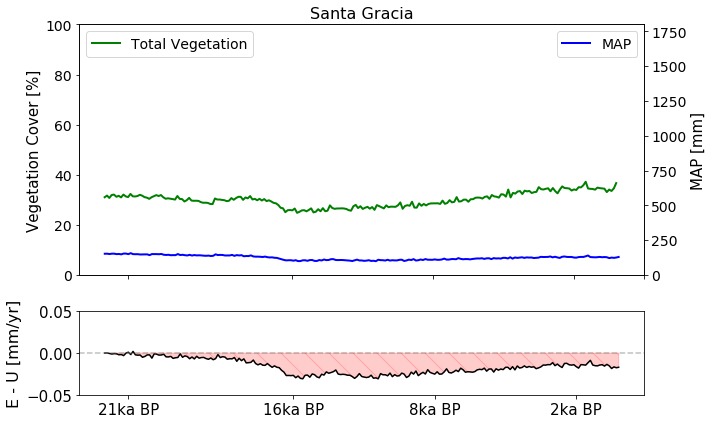

In [23]:
fig,ax = plt.subplots(nrows = 2,
                      ncols = 1,
                      figsize = [10,6], 
                      gridspec_kw = {'height_ratios' : [3,1] },
                      sharex = True)


#AZUCAR
ax[0].set_title('Santa Gracia', fontsize = 16)
ax[0].plot(time_vector, santa_gracia_vegi_cum, 'g', label = 'Total Vegetation', linewidth = 2)
ax[0].axes.tick_params(labelsize = 14)
ax[0].legend(loc = 'upper left', fontsize = 14)
ax[0].set_ylim(0,100)
ax[0].set_ylabel('Vegetation Cover [%]', fontsize = 15)

ax00_y = ax[0].twinx()
ax00_y.plot(time_vector, santa_gracia_rain, 'b', label = 'MAP', linewidth = 2)
ax00_y.legend(loc = 'upper right', fontsize = 14)
ax00_y.axes.tick_params(labelsize = 14)
ax00_y.set_ylim(0, 1800)
ax00_y.set_ylabel('MAP [mm]', fontsize = 15)


ax[1].plot(time_vector, [e-.1 for e in santa_gracia_erosion], 'k', linewidth = 1.5)
ax[1].axes.tick_params(labelsize = 15)
ax[1].set_ylim(-0.05,0.05)
ax[1].set_ylabel('E - U [mm/yr]', fontsize = 16)
ax[1].axhline(0, color = 'grey', linestyle = '--', alpha = 0.5)

e_minus_u = [e-.1 for e in santa_gracia_erosion]
ax[1].fill_between(time_vector, 0, e_minus_u,
                   where = e_minus_u > np.zeros(np.shape(e_minus_u)),
                   color = 'red',
                   hatch = '//',
                   alpha = 0.35)
ax[1].fill_between(time_vector, 0, e_minus_u,
                   where = e_minus_u < np.zeros(np.shape(e_minus_u)),
                   color = 'red',
                   hatch = '\\',
                   alpha = 0.2)

ax[0].set_xticks(x1)
ax[0].set_xticklabels(labels)

plt.tight_layout()

plt.savefig('santa_gracia_total_veg_map_erosion.png')

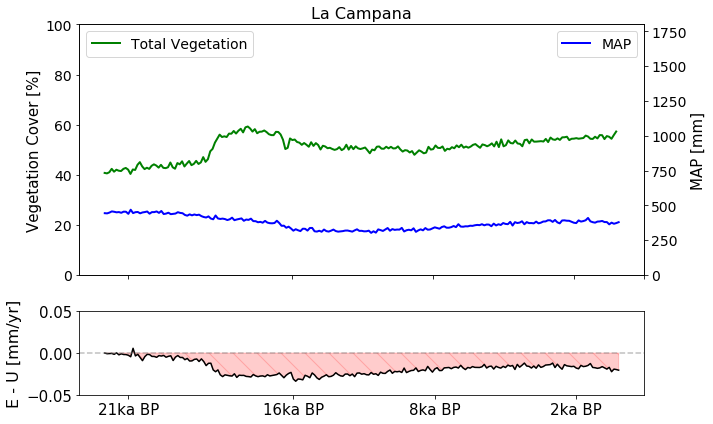

In [24]:
fig,ax = plt.subplots(nrows = 2,
                      ncols = 1,
                      figsize = [10,6], 
                      gridspec_kw = {'height_ratios' : [3,1] },
                      sharex = True)


#AZUCAR
ax[0].set_title('La Campana', fontsize = 16)
ax[0].plot(time_vector, la_campana_vegi_cum, 'g', label = 'Total Vegetation', linewidth = 2)
ax[0].axes.tick_params(labelsize = 14)
ax[0].legend(loc = 'upper left', fontsize = 14)
ax[0].set_ylim(0,100)
ax[0].set_ylabel('Vegetation Cover [%]', fontsize = 15)

ax00_y = ax[0].twinx()
ax00_y.plot(time_vector, la_campana_rain, 'b', label = 'MAP', linewidth = 2)
ax00_y.legend(loc = 'upper right', fontsize = 14)
ax00_y.axes.tick_params(labelsize = 14)
ax00_y.set_ylim(0, 1800)
ax00_y.set_ylabel('MAP [mm]', fontsize = 15)


ax[1].plot(time_vector, [e-.1 for e in la_campana_erosion], 'k', linewidth = 1.5)
ax[1].axes.tick_params(labelsize = 15)
ax[1].set_ylim(-0.05,0.05)
ax[1].set_ylabel('E - U [mm/yr]', fontsize = 16)
ax[1].axhline(0, color = 'grey', linestyle = '--', alpha = 0.5)

e_minus_u = [e-.1 for e in la_campana_erosion]
ax[1].fill_between(time_vector, 0, e_minus_u,
                   where = e_minus_u > np.zeros(np.shape(e_minus_u)),
                   color = 'red',
                   hatch = '//',
                   alpha = 0.35)
ax[1].fill_between(time_vector, 0, e_minus_u,
                   where = e_minus_u < np.zeros(np.shape(e_minus_u)),
                   color = 'red',
                   hatch = '\\',
                   alpha = 0.2)

ax[0].set_xticks(x1)
ax[0].set_xticklabels(labels)

plt.tight_layout()

plt.savefig('la_campana_total_veg_map_erosion.png')

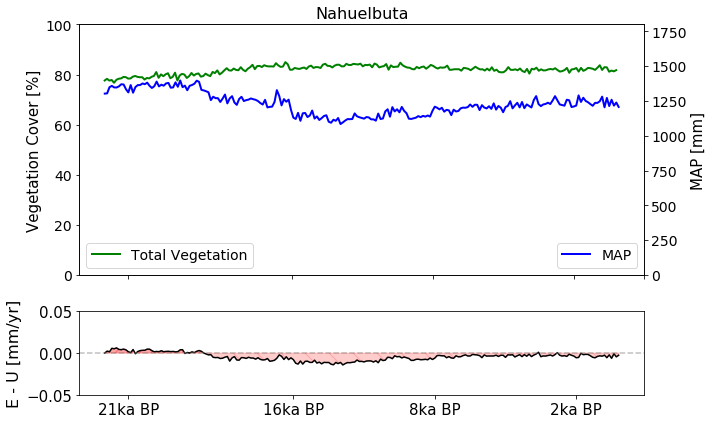

In [25]:
fig,ax = plt.subplots(nrows = 2,
                      ncols = 1,
                      figsize = [10,6], 
                      gridspec_kw = {'height_ratios' : [3,1] },
                      sharex = True)


#AZUCAR
ax[0].set_title('Nahuelbuta', fontsize = 16)
ax[0].plot(time_vector, nahuelbuta_vegi_cum, 'g', label = 'Total Vegetation', linewidth = 2)
ax[0].axes.tick_params(labelsize = 14)
ax[0].legend(loc = 'lower left', fontsize = 14)
ax[0].set_ylim(0,100)
ax[0].set_ylabel('Vegetation Cover [%]', fontsize = 15)

ax00_y = ax[0].twinx()
ax00_y.plot(time_vector, nahuelbuta_rain, 'b', label = 'MAP', linewidth = 2)
ax00_y.legend(loc = 'lower right', fontsize = 14)
ax00_y.axes.tick_params(labelsize = 14)
ax00_y.set_ylim(0, 1800)
ax00_y.set_ylabel('MAP [mm]', fontsize = 15)


ax[1].plot(time_vector, [e-.1 for e in nahuelbuta_erosion], 'k', linewidth = 1.5)
ax[1].axes.tick_params(labelsize = 15)
ax[1].set_ylim(-0.05,0.05)
ax[1].set_ylabel('E - U [mm/yr]', fontsize = 16)
ax[1].axhline(0, color = 'grey', linestyle = '--', alpha = 0.5)

e_minus_u = [e-.1 for e in nahuelbuta_erosion]
ax[1].fill_between(time_vector, 0, e_minus_u,
                   where = e_minus_u > np.zeros(np.shape(e_minus_u)),
                   color = 'red',
                   hatch = '//',
                   alpha = 0.35)
ax[1].fill_between(time_vector, 0, e_minus_u,
                   where = e_minus_u < np.zeros(np.shape(e_minus_u)),
                   color = 'red',
                   hatch = '\\',
                   alpha = 0.2)

ax[0].set_xticks(x1)
ax[0].set_xticklabels(labels)

plt.tight_layout()

plt.savefig('nahuelbuta_total_veg_map_erosion.png')